In [51]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy.ndimage.filters import gaussian_filter1d, maximum_filter1d, median_filter

%matplotlib inline

In [8]:
curve = np.loadtxt('../SampleData/sample_row_avg.dat')
curve = curve[~np.isnan(curve)]
print(curve.shape, curve.dtype, '[',curve.min(), curve.max(),']')

(14695,) float64 [ 12423.460144927536 38758.75 ]


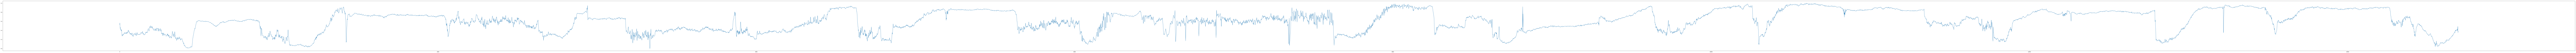

In [110]:
def normalize1D(arr):
    normed = arr - arr.min()
    return normed/normed.max()

normed_curve = normalize1D(curve)

fig, ax = plt.subplots(figsize=(500,10))
ax.plot(np.arange(0, normed_curve.size), normed_curve)

## Make a turbite/hybrid event-bed template

In [112]:
normed_curve.min()

0.0

(0, 730)

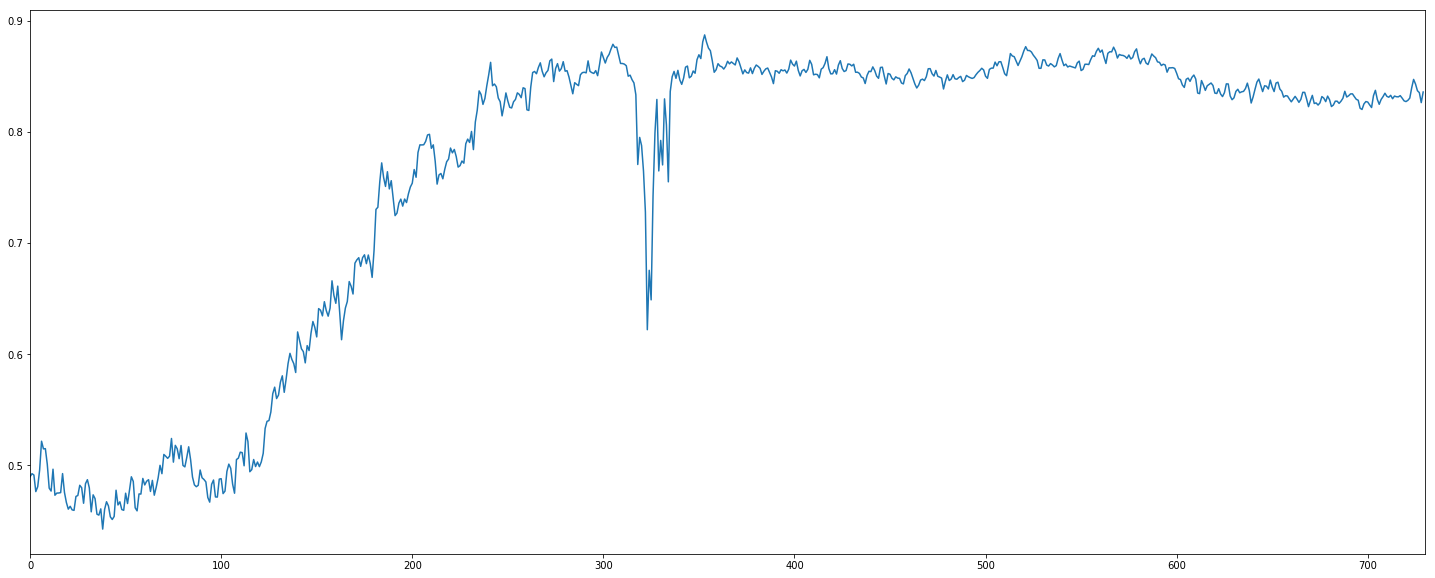

In [113]:
fig, ax = plt.subplots(figsize=(25,10))
lpix, rpix = 4870, 5600
ax.plot(np.arange(0, rpix-lpix), normed_curve[lpix:rpix])
ax.set_xlim(0,rpix-lpix)

In [173]:
normed_example = normed_curve[lpix:rpix]

(0, 730)

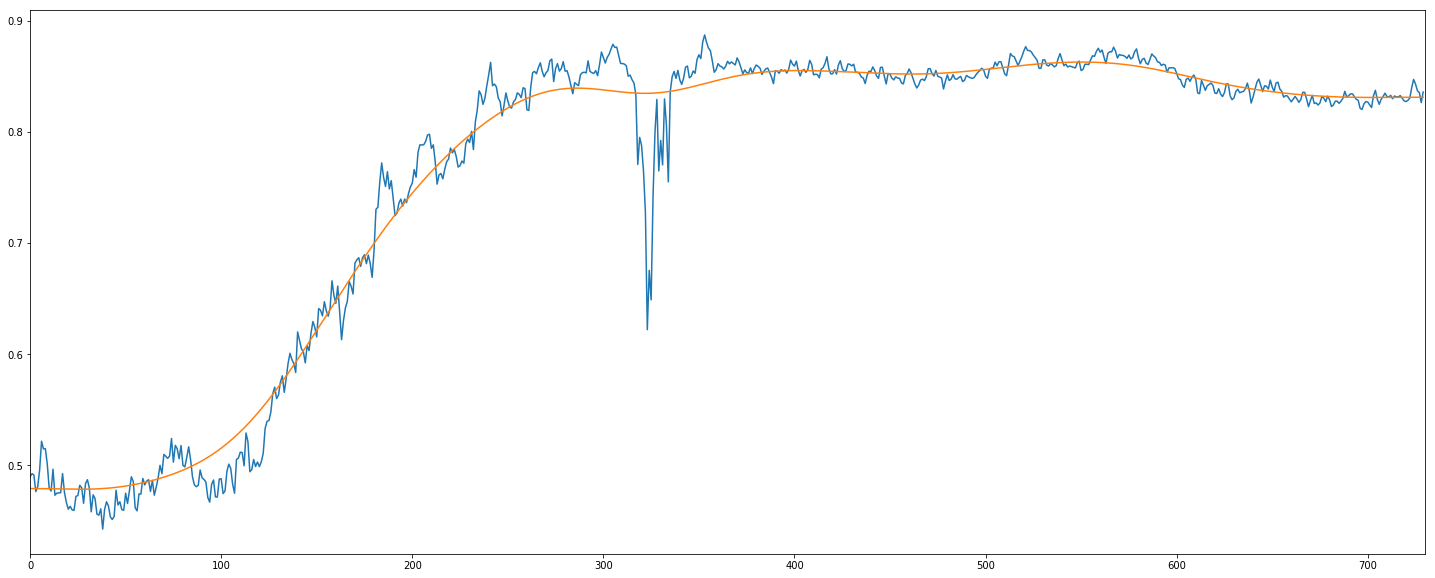

In [174]:
# Smoothing into template

smooth_example = gaussian_filter1d(normed_example, 30)
#smooth_example = median_filter(raw_example, 50)

fig, ax = plt.subplots(figsize=(25,10))

ax.plot(np.arange(0, normed_example.size), normed_example)

ax.plot(np.arange(0, normed_example.size), smooth_example)

ax.set_xlim(0,raw_example.size)

Good enough for now.

## Try some correlation

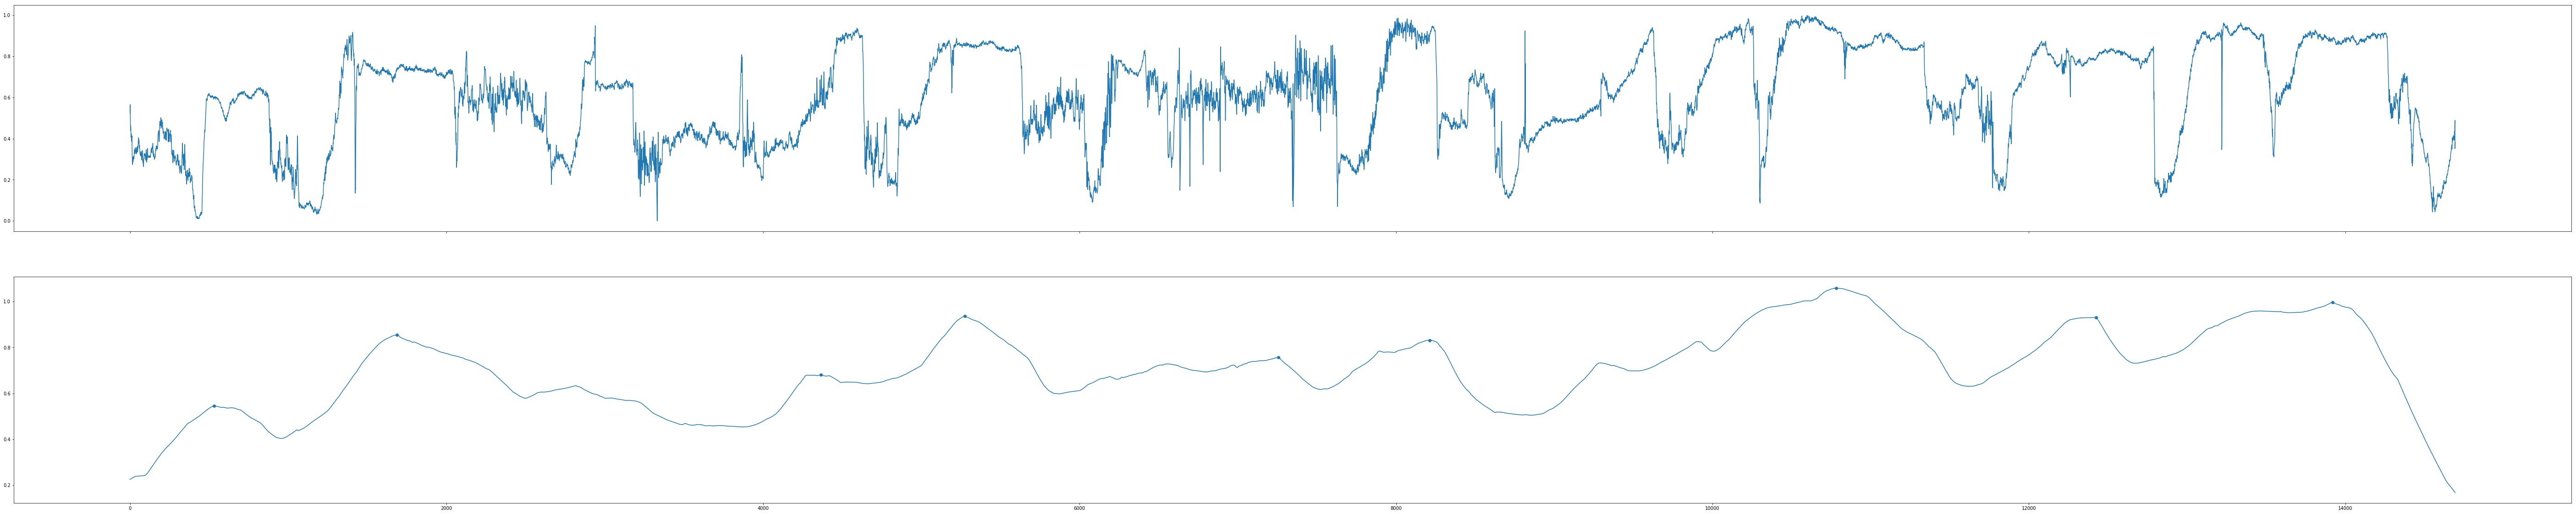

In [276]:
def norm_and_correlate(sig, template, mode='same'):
    sig = (sig) / len(sig)
    template = (template) / np.std(template)
    return np.correlate(sig, template, mode)

fig, (axCurve, axCorr) = plt.subplots(2, 1, figsize=(100,20), sharex=True)

norm_factor = normed_curve.std() * normed_example.std() * (len(normed_curve)+1)
corr = signal.correlate(normed_curve, normed_example, mode='same') / norm_factor
match_idxs = signal.argrelmax(corr, order=500)

axCurve.plot(np.arange(0, curve.size), normed_curve)
#axCurve.set_xlim(0, curve.size)

axCorr.plot(np.arange(0, corr.size), corr)
axCorr.scatter([idx for idx in match_idxs], corr[match_idxs])

#d_corr = np.gradient(corr)
#dd_corr = np.gradient(d_corr)
#axGrad.plot(np.arange(0, curve.size), d_corr)

531


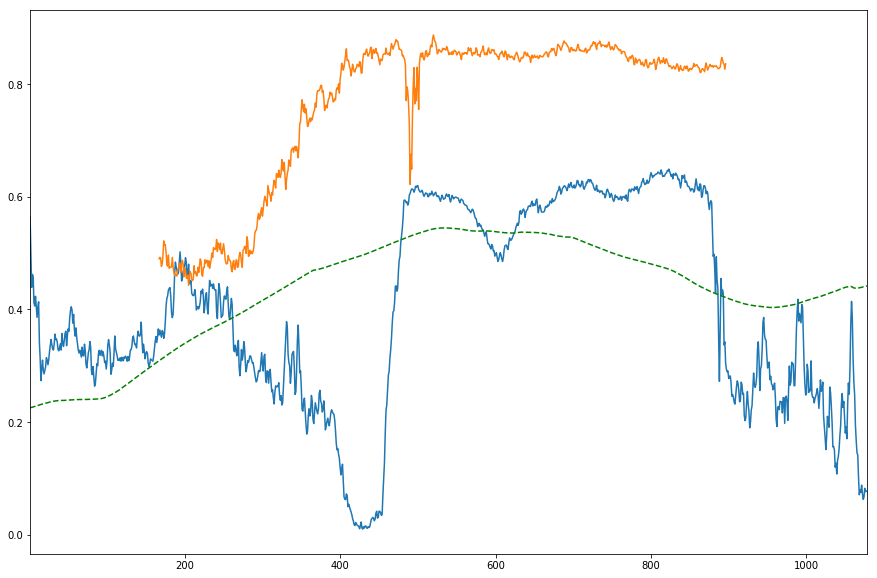

1686


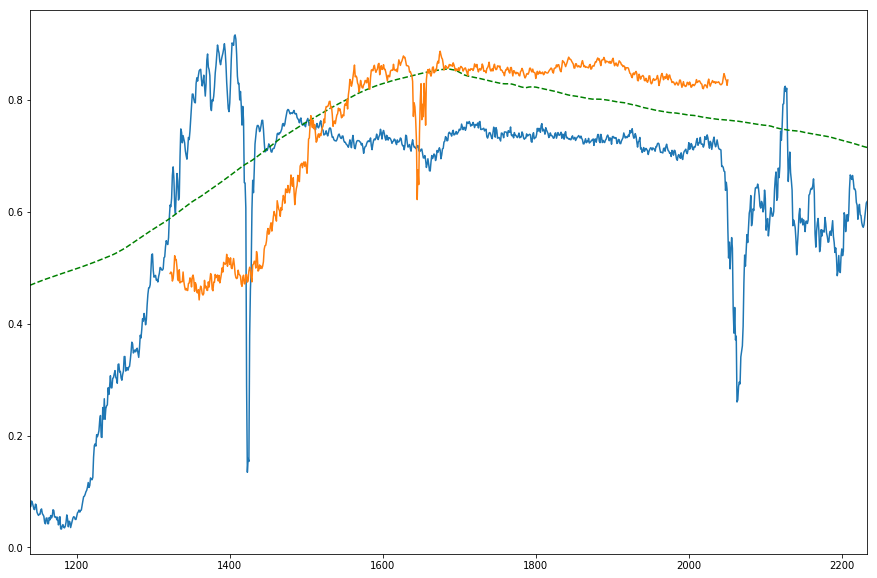

4366


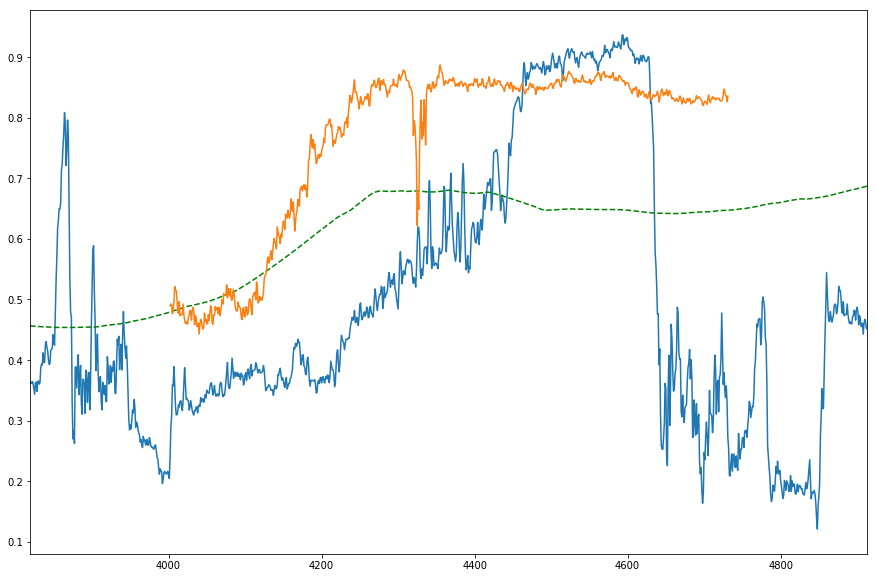

5275


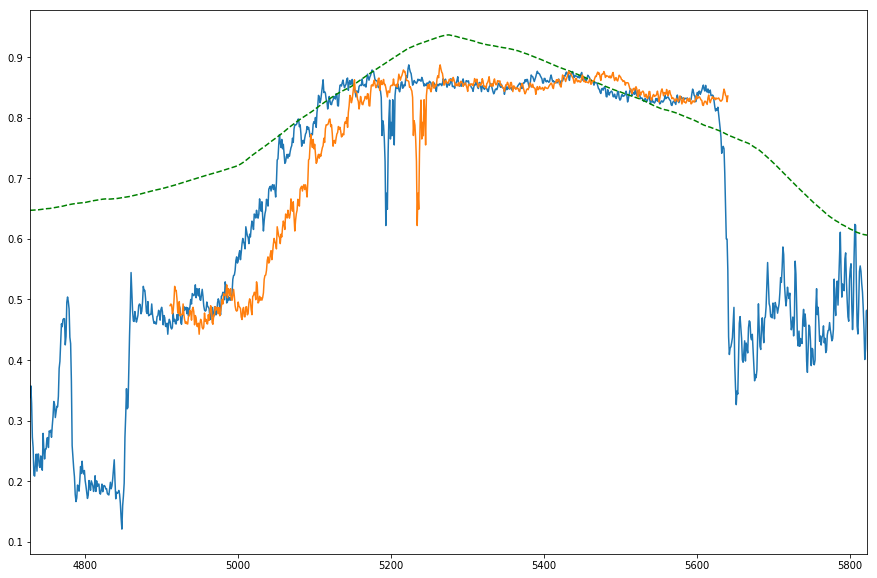

7256


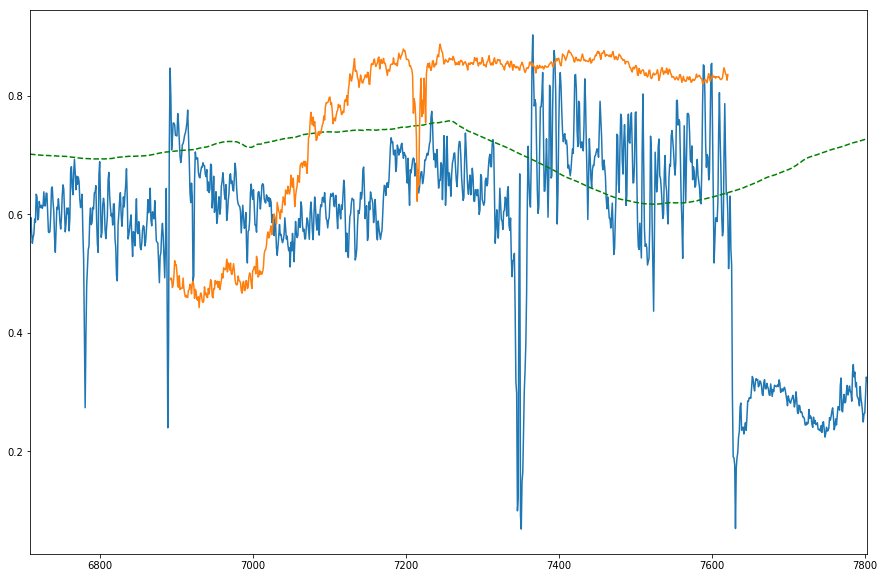

8212


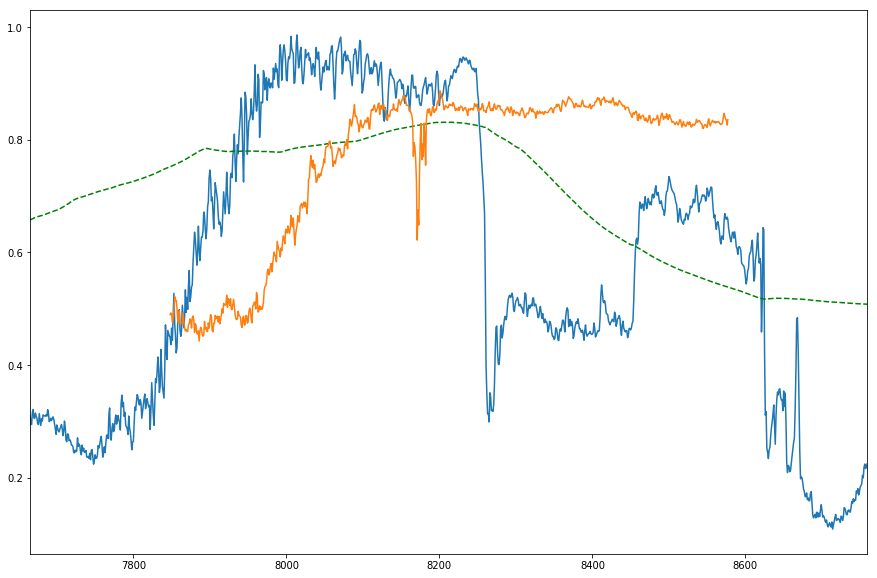

10782


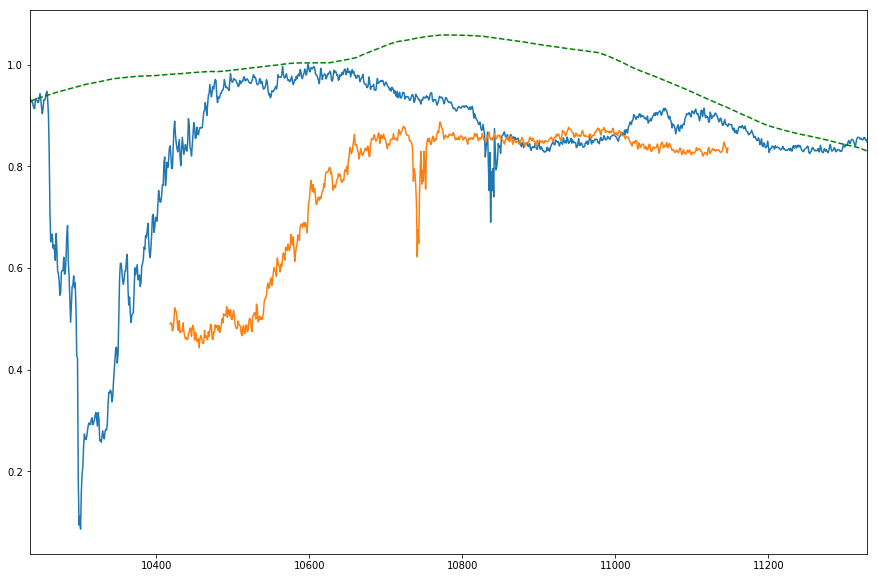

12424


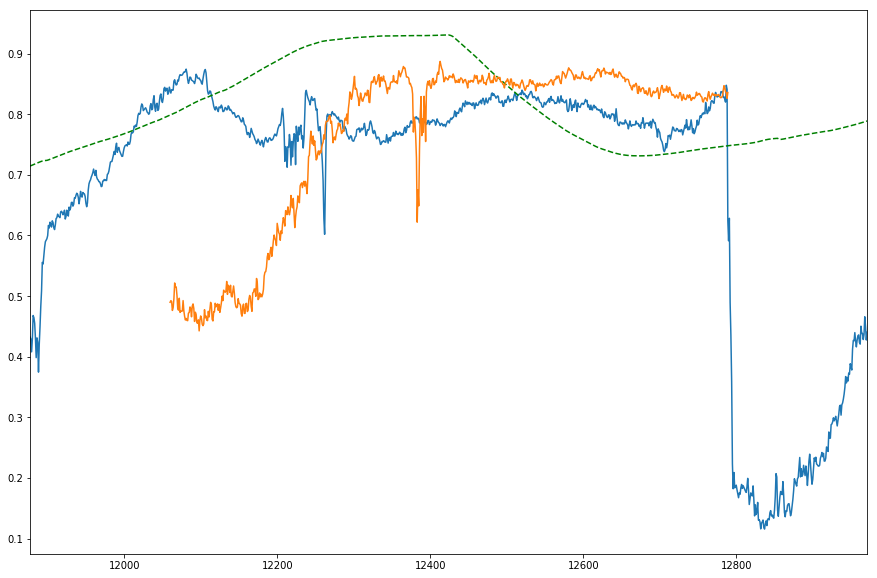

13918


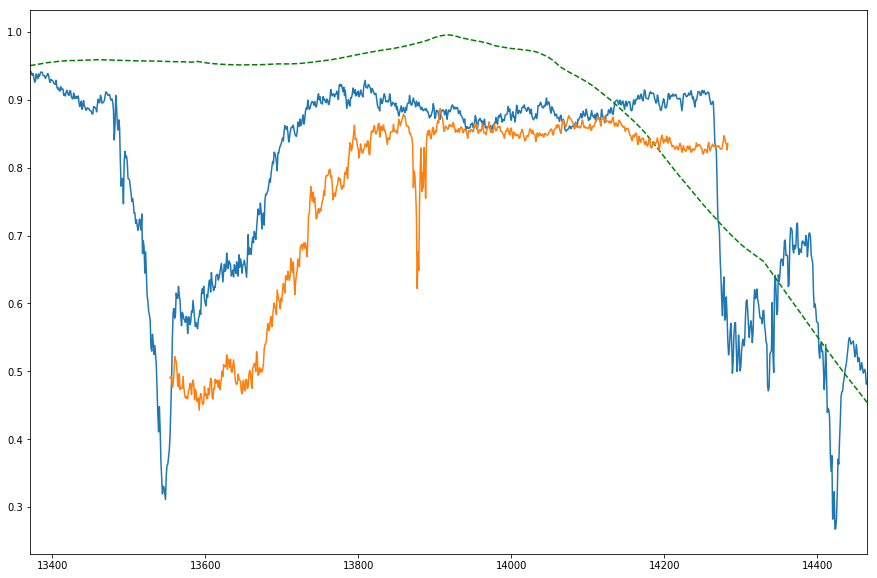

In [278]:
tlen = normed_example.size

def centered_xvals(idx, n):
    x = np.arange(n)
    m = int(np.median(x)) # down 1 if odd
    xv = x + (idx-m)
    return xv[xv>0]

for idx in match_idxs[0]:
    #idx = midx-htlen
    print(idx)
    fig, ax = plt.subplots(figsize=(15,10))
    wide_x = centered_xvals(idx, int(tlen*1.5))
    temp_x = centered_xvals(idx, tlen)
    ax.plot(wide_x, normed_curve[wide_x[0]:wide_x[-1]+1])
    ax.plot(wide_x, corr[wide_x[0]:wide_x[-1]+1], 'g--')
    ax.plot(temp_x, normed_example)
    ax.set_xlim(wide_x[0], wide_x[-1])
    plt.show()
    

In [149]:
for idx in match_idxs[0]:
    print(idx)

895
2050
4730
5639
7620
8576
11146
12788
14282


In [131]:
fcorr = signal.correlate(raw_example, raw_example, mode='full')
norm_factor = np.sqrt(np.sum(raw_example**2)*np.sum(raw_example**2))

In [262]:
centered_xvals(50, normed_example.size)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

array([-314, -313, -312, -311, -310, -309, -308, -307, -306, -305, -304,
       -303, -302, -301, -300, -299, -298, -297, -296, -295, -294, -293,
       -292, -291, -290, -289, -288, -287, -286, -285, -284, -283, -282,
       -281, -280, -279, -278, -277, -276, -275, -274, -273, -272, -271,
       -270, -269, -268, -267, -266, -265, -264, -263, -262, -261, -260,
       -259, -258, -257, -256, -255, -254, -253, -252, -251, -250, -249,
       -248, -247, -246, -245, -244, -243, -242, -241, -240, -239, -238,
       -237, -236, -235, -234, -233, -232, -231, -230, -229, -228, -227,
       -226, -225, -224, -223, -222, -221, -220, -219, -218, -217, -216,
       -215, -214, -213, -212, -211, -210, -209, -208, -207, -206, -205,
       -204, -203, -202, -201, -200, -199, -198, -197, -196, -195, -194,
       -193, -192, -191, -190, -189, -188, -187, -186, -185, -184, -183,
       -182, -181, -180, -179, -178, -177, -176, -175, -174, -173, -172,
       -171, -170, -169, -168, -167, -166, -165, -1

In [162]:
curve.mean()

25120.120083319125

In [167]:
corr.shape

(14695,)

In [177]:
np.std(normed_curve)

0.22948494688158083

In [178]:
np.std(normed_example)

0.1411886800972021

In [206]:
norm_factor

476.127944876326

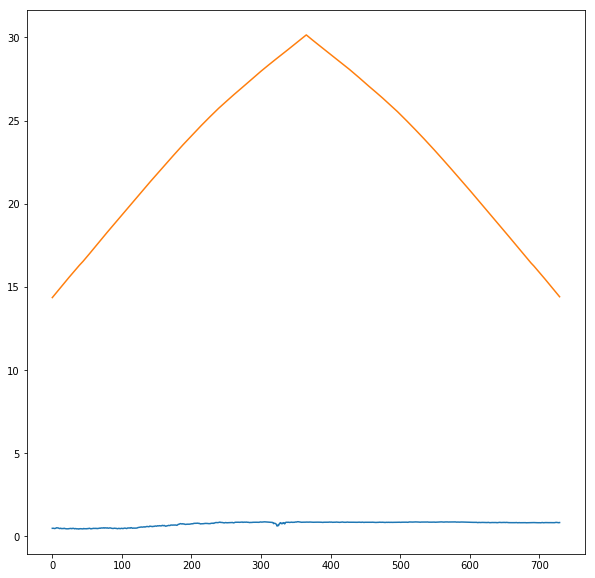

In [235]:
fig, ax = plt.subplots(figsize=(10,10))

itself = np.correlate(normed_example, 
                          normed_example, mode='same')

ax.plot(normed_example)
ax.plot(itself / (normed_example.std()**2*normed_example.size))

In [222]:
itself.size

1459

In [247]:
a = np.arange(9)

In [240]:
a[int(len(a)/2)]

5

In [252]:
def centered_xvals(arr_size, idx):
    x = np.arange(arr_size)
    m = int(np.median(x)) # down 1 if odd
    return x + (idx-m)
    

In [253]:
centered_xvals(10, 43)

array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [271]:
wide_x

array([ -16,  -15,  -14, ..., 1076, 1077, 1078])

In [258]:
np.arange(10) + 5

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [268]:
wide_x

array([ -16,  -15,  -14, ..., 1076, 1077, 1078])

In [273]:
wide_x[wide_x>0]

array([   1,    2,    3, ..., 1076, 1077, 1078])